# Module Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
import warnings 
import xgboost
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

warnings.simplefilter(action="ignore", category=UserWarning)

## Dataset Import

Using the Diabetes dataset.

In [2]:
# Read in the diabetes.csv dataset into "df" 
df =  pd.read_csv("diabetes.csv", index_col= False )

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [6]:
# Find the number of outcomes for both positive and negative. Normalize the result to get a precentage. 
# Assign the output to "outcomes"
# YOUR CODE HERE
outcomes = df.Outcome.value_counts(normalize=True)
### END SOLUTION
print(outcomes)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64


## Training and Test Datasets

Let's split the data 70/30 into a training set (which we will use to build models) and a test set (on which we will evaluate any model we build).

In [8]:
# Set "X" to all independent variables and set "y" to the Outcome variable
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [9]:
# Encode string class values as integers to avoid errors in newer versions of XGBoost
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
y = label_encoder.transform(y)

In [10]:
# Split data into training and test set: "X_train, X_test, y_train, y_test"
# Test size should be 0.3 with random_state set to 7
# Set "eval_set" to the combination of X_test and y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
eval_set=[(X_test, y_test)]

print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


In [11]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

#set "st" to the current datetime
# YOUR CODE HERE
st = datetime.now()

# Use xgboost.sklearn.XGBClassifier to create a model called "clf" with the following parameters:
#     objective: "binary:logistic" 
#     learning_rate: 0.05 
#     seed: 9616 
#     max_depth: 20 
#     gamma: 10 
#     n_estimators: 500
# YOUR CODE HERE

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

# Fit the model with training data. Also use the following parameters:
#     early_stopping_rounds: 20 
#     eval_metric: "auc"
#     eval_set: eval_set
#     verbose: False
# YOUR CODE HERE
clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=False)


print(datetime.now()-st)

# set "y_pred" to the clf predictions on the test dataset. 
# YOUR CODE HERE
y_pred = clf.predict(X_test)

# Get the accuracy score of the model set the output to "accuracy".
# YOUR CODE HERE
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)

print("Accuracy: %.10f%%" % (accuracy * 100.0))

# Get the ROC-AUC score for the model. 
# YOUR CODE HERE
accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)

print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))


Initializing xgboost.sklearn.XGBClassifier and starting training...
0:00:00.882685
Accuracy: 75.7575757576%
ROC-AUC: 72.7891156463%


#### View the results of your model

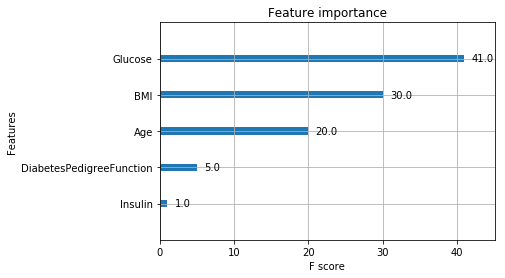

In [12]:
xgboost.plot_importance(clf)